## 1 minute, 스낵 파이썬 - 001. f-string의 이중 중괄호
- 문자열의 길이를 특정 길이로 유지해야할 때
- 왼쪽,오른쪽 정렬
- 문자열 개수 맞추기
    - x -> 01
    - 10

In [8]:
숫자 = 10
자릿수 = 10
# 숫자를 자릿수만큼 왼쪽 정렬
f'{숫자:<{자릿수}}'

'10        '

In [9]:
# 숫자를 자릿수만큼 오른쪽 정렬
f'{숫자:<{자릿수}}'

'10        '

In [10]:
print(len(f'{숫자:<{자릿수}}'))

10


In [12]:
# 오른쪽 정렬 후, 남는 자리를 0으로 채울 것이다.
f'{숫자:0{자릿수}d}'

'0000000010'

In [13]:
원주율 = 3.141592
소수점 = 3
f'{원주율:.{소수점}f}'

'3.142'

## 1 minute, 스낵 파이썬 - 002. 왈러스 연산자

* f'string 추가영상 : https://youtu.be/_UdOzBvpu90
* walrus 추가영상 : https://youtu.be/dY7mVQXmwk4 (Python 3.8 update)

* 특정 변수명을 재할당하고, return 해야할 때 왈러스 연산자 := 를 사용하면 좋습니다.

In [16]:
value = 10
# 할당 뿐만 아니라, return 역할도 함
(value := value + 1) #왈러스

11

In [19]:
# this sentence returns value
(value := value + 1) 

13

In [20]:
count = 0
while (count := count + 1) < 10:
    print(count)

1
2
3
4
5
6
7
8
9


In [21]:
count = 0
result = 0
while (count := count + 1) < 101:
    result += count
    
result

5050

In [22]:
def 시그마(n):
    count = 0
    result = 0
    while (count := count + 1) < n + 1:
        result += count
    return result


if 합 := 시그마(100):
    print(합)
else:
    print('1부터 정수형태로 입력이 가능합니다.')
    
print(합 + 1000)

5050
6050


In [23]:
def 시그마(n):
    count = 0
    result = 0
    while (count := count + 1) < n + 1:
        result += count
    return result

if (합 := 시그마(100)) == 5050:
    print('5050이 출력되었습니다.')
else:
    print('1부터 정수형태로 입력이 가능합니다.')

print(합 + 1000)

5050이 출력되었습니다.
6050


## 1 minute, 스낵 파이썬 - 003. 딕셔너리 KeyError 처리

* collections defaultdict 추가영상 : https://youtu.be/zF01pfp1MOo
* Python 3.10 에 switch/case와 비슷한 match/case 구문 : https://youtu.be/9C2h3WIO8J8


- key error : dictionry.get 메소드로 default value 할당

In [24]:
def 요일구하기(요일):
    return { 
        0: '일요일',
        1: '월요일',
        2: '화요일',
        3: '수요일',
        4: '목요일',
        5: '금요일',
        6: '토요일'
    }.get(요일, '요일없음')

In [25]:
요일구하기(10)

'요일없음'

In [27]:
# got key error
{ 
    0: '일요일',
    1: '월요일',
    2: '화요일',
    3: '수요일',
    4: '목요일',
    5: '금요일',
    6: '토요일'
}[10]

KeyError: 10

## 1 minute, 스낵 파이썬 - 004. 리스트 append와 리스트컴프리헨션 성능 비교
- dis module은 해당 코드의 byte 코드를 알 수 있다.
- 속도 측정만 한다.
- list 컴ㅍ프리 헨션이 빠르다.
- 메모리 측정을 하면, 메모리에 숫자가 축적되기 때문에 줄어든?

In [31]:


import dis

def 테스트():
    x = [i for i in range(10)]
    return x

dis.dis(테스트)

  4           0 LOAD_CONST               1 (<code object <listcomp> at 0x11171fa80, file "/var/folders/cf/hj01t_md1j52kbyfrvqn3cx40000gn/T/ipykernel_2311/2211567802.py", line 4>)
              2 LOAD_CONST               2 ('테스트.<locals>.<listcomp>')
              4 MAKE_FUNCTION            0
              6 LOAD_GLOBAL              0 (range)
              8 LOAD_CONST               3 (10)
             10 CALL_FUNCTION            1
             12 GET_ITER
             14 CALL_FUNCTION            1
             16 STORE_FAST               0 (x)

  5          18 LOAD_FAST                0 (x)
             20 RETURN_VALUE

Disassembly of <code object <listcomp> at 0x11171fa80, file "/var/folders/cf/hj01t_md1j52kbyfrvqn3cx40000gn/T/ipykernel_2311/2211567802.py", line 4>:
  4           0 BUILD_LIST               0
              2 LOAD_FAST                0 (.0)
        >>    4 FOR_ITER                 8 (to 14)
              6 STORE_FAST               1 (i)
              8 LOAD_FAST        

In [30]:
import dis

def 테스트():
    x = []
    for i in range(10):
        x.append(i)
    return x

dis.dis(테스트)

  4           0 BUILD_LIST               0
              2 STORE_FAST               0 (x)

  5           4 LOAD_GLOBAL              0 (range)
              6 LOAD_CONST               1 (10)
              8 CALL_FUNCTION            1
             10 GET_ITER
        >>   12 FOR_ITER                14 (to 28)
             14 STORE_FAST               1 (i)

  6          16 LOAD_FAST                0 (x)
             18 LOAD_METHOD              1 (append)
             20 LOAD_FAST                1 (i)
             22 CALL_METHOD              1
             24 POP_TOP
             26 JUMP_ABSOLUTE           12

  7     >>   28 LOAD_FAST                0 (x)
             30 RETURN_VALUE


In [ ]:
# !pip install memory_profiler
# !pip install ipython-memory-usage

In [ ]:
# 메모리 측정은 하지 않음
# import memory_profiler
# %load_ext memory_profiler

# import ipython_memory_usage 
# import ipython_memory_usage.ipython_memory_usage

In [32]:
%%timeit #%memit

def 테스트(n):
    s = []
    for i in range(n+1):
        i = i**2
        s.append(i)
    return sum(s)

테스트(1000000)

365 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%%timeit #%memit

def 테스트(n):
    s = [i**2 for i in range(n+1)]
    return sum(s)

테스트(1000000)

293 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# import psutil

# def 현재메모리사용량():
#     p = psutil.Process()
#     메모리사용 = p.memory_info().rss / 2 ** 20
#     print(f'{메모리사용: 10.5f} MB')

In [ ]:
# def 테스트(n):
#     s = []
#     for i in range(n+1):
#         i = i**2
#         s.append(i)
#     return sum(s)

# 현재메모리사용량()
# 테스트(100000000)
# 현재메모리사용량()

In [ ]:
# def 테스트(n):
#     s = [i**2 for i in range(n+1)]
#     return sum(s)

# 현재메모리사용량()
# 테스트(100000000)
# 현재메모리사용량()

## 1 minute, 스낵 파이썬 - 005. sorted의 key 응용
- key 값 기준 정렬,
- key 대소문자 

In [37]:
sorted({1: 'D', 2: 'B', 3: 'B', 4: 'E', 5: 'A'})

[1, 2, 3, 4, 5]

In [40]:
# 대소문자 가리지 않고 정렬
sorted("This is a test string from Andrew".split(), key=str.lower)

['a', 'Andrew', 'from', 'is', 'string', 'test', 'This']

In [42]:
student_tuples = [
    ('john', 'A', 15),
    ('jane', 'B', 12),
    ('dave', 'B', 10),
]

In [44]:
# 10, 12 ,15
sorted(student_tuples, key=lambda student: student[2])

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]

In [46]:
# 객체의 특정 요소로 정렬
class Student:
    def __init__(self, name, grade, age):
        self.name = name
        self.grade = grade
        self.age = age
    def __repr__(self):
        return repr((self.name, self.grade, self.age))

In [47]:
student_objects = [
    Student('john', 'A', 15),
    Student('jane', 'B', 12),
    Student('dave', 'B', 10),
]

In [48]:
sorted(student_objects, key=lambda student: student.age)

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]

In [51]:
# 튜플을 정렬
from operator import itemgetter, attrgetter

sorted(student_tuples, key=itemgetter(2))

[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]

In [63]:
# 모듈 사용해서,객체의 특정요소 기준 정렬
sorted(student_objects, key=attrgetter('age'))
# 1번째 정렬후 2번째 정렬
sorted(student_tuples, key=itemgetter(1, 2)) #다중 순회 허용 # 다중 정렬
# grade 먼저 정렬하고, age 정렬
sorted(student_objects, key=attrgetter('grade', 'age'))

[('john', 'A', 15), ('dave', 'B', 10), ('jane', 'B', 12)]

In [64]:
# reverse 옵션으로 내림차순
sorted(student_tuples, key=itemgetter(2), reverse=True)

[('john', 'A', 15), ('jane', 'B', 12), ('dave', 'B', 10)]

In [65]:
test = ['a', 'aaa', 'bb', 'cccc']

In [66]:
# 문자열 길이순
sorted(test, key=len)

['a', 'bb', 'aaa', 'cccc']

In [68]:
test = [(30, 20, 10), (10, 100, 90), (90, 90, 90), (50, 20, 30), (10, 20, 10)]

sorted(test)
sorted(test, key = lambda x : x[0])
# 더한값 기준
sorted(test, key = lambda x : sum(x))

[(10, 20, 10), (30, 20, 10), (50, 20, 30), (10, 100, 90), (90, 90, 90)]

In [69]:
test = [10, 2, 1, 2, 9, 3, 0, 5, 5, 5, 6, 9, 3, 11, 22]
우선순위그룹 = [0, 1, 11, 111]

def 우선순위판별(값):
    if 값 in 우선순위그룹:
        return (False, 값)
    return (True, 값)
# 우선순위 판별, 0,1,11,111에 있는 값에 있는 값
sorted(test, key=우선순위판별)
sorted(test, key=lambda x: False if x in 우선순위그룹 else True)
# 정렬을 하고 싶다면, 무조건 TF,Value 값을 반환해야함
sorted(test, key=lambda x: (False, x) if x in 우선순위그룹 else (True, x))

[0, 1, 11, 2, 2, 3, 3, 5, 5, 5, 6, 9, 9, 10, 22]

## 1 minute, 스낵 파이썬 - 006. 타입 힌트(type annotation)

* Python은 변수의 타입이 실행 시점에 결정되는 언어(동적 프로그래밍 언어)
* C와 JAVA는 변수를 선언할 때 반드시 타입을 명시, 컴파일 시점에 변수의 타입이 결정(정적 프로그래밍 언어)
* mypy 모듈을 사용하면 타입힌트에 오류가 있는지 확인할 수 있음

In [ ]:
number = 1 # type: int

def greeting(name):
    # type: (str) -> str
    return 'Hello, ' + name

*  Pycharm

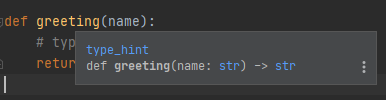

In [ ]:
# Python 3.5 이상 부터는 더 나은 타입 힌트를 위해 
# 타입 어노테이션(type annotation)이라는 기능을 추가하였습니다.

In [70]:
number: int = 1
name: str = "홍길동"
arr: list = ['a', 'b', 'c']

In [71]:
def greeting(name: str) -> str:
    return 'Hello, ' + name

In [72]:
# typing 모듈로 list, set, tuple, dict 안의 모듈안에 있는 값들을 명시할 수 있게 됨

import typing

arr: typing.List[int] = [1, 2, 3]
alpha: typing.Tuple[str, str, str] = ('a', 'b', 'c')
student: typing.Dict[str, int] = {'홍길동': 1, '춘향': 2}

In [75]:
# 에러를 강제하지 않는다.
number: int = '123'

In [76]:
number

'123'

## 1 minute, 스낵 파이썬 - 007. sum을 활용한 개별 요소 합치기
-  빈리스트를 합쳐줍니다.

In [85]:
# 앞에 합쳐진다.
li = [['a', 'b', 'c'], [1, 2, 3], ['x', 'y', 'z']]
sum(li, ['!!'])

['!!', 'a', 'b', 'c', 1, 2, 3, 'x', 'y', 'z']

In [89]:
# 빈리스트 합치기
li = [['a', 'b', 'c'], [1, 2, 3], ['x', 'y', 'z']]
sum(li, [])

['a', 'b', 'c', 1, 2, 3, 'x', 'y', 'z']

In [90]:
# tuple로도 가능
li = (('a', 'b', 'c'), (1, 2, 3), ('x', 'y', 'z'))
sum(li, ())

('a', 'b', 'c', 1, 2, 3, 'x', 'y', 'z')

In [91]:
# in dictionry, key 을 합친다.
li = {1:'one', 2:'two'}
sum(li, 5)

8

In [94]:
data = [[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]

In [97]:
# get error
sum(data)

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [98]:
sum(data,[])

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [99]:
sum(sum(data, []))

36

In [100]:
import numpy as np

data = [[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]
np.sum(data)
# 36

ModuleNotFoundError: No module named 'numpy'

In [103]:
np.sum(data, axis = 0)
# array([9,12,15])

NameError: name 'np' is not defined

In [105]:
np.sum(data, axis = 1)
# array([3,12,21])

NameError: name 'np' is not defined

## 1 minute, 스낵 파이썬 - 008. 제너레이터를 활용한 특정 값 무한 반복자 만들기
- generator는 list나 tuple 보다 메모리상 이점이 있다

In [111]:
# create generator
def range_1_to_4():
    yield 1
    yield 2
    yield 3

In [112]:
for i in range_1_to_4():
    print(i)

1
2
3


In [114]:
# 
range_1_to_4()

<generator object range_1_to_4 at 0x1117504a0>

In [119]:
g = range_1_to_4()

In [120]:
next(g)

1

In [121]:
next(g)

2

In [122]:
next(g)

3

In [123]:
next(g)

StopIteration: 

In [124]:
# 제너레이터 표현식(tuple 사용시)
g = (i for i in range(1, 4))

In [125]:
g

<generator object <genexpr> at 0x111750a50>

In [128]:
for i in g:
    print(i)

1
2
3


In [139]:
# 무한히 반복자를 순회하는 generator
def repeat(반복자):
    if 반복자:
        while True:
            for 반복자개별요소 in 반복자:
                yield 반복자개별요소

In [136]:
# 첫번째 파라미터의 개수 만큼, 원소가 반복됨
list(zip('111222333', repeat('ab')))

[('1', 'a'),
 ('1', 'b'),
 ('1', 'a'),
 ('2', 'b'),
 ('2', 'a'),
 ('2', 'b'),
 ('3', 'a'),
 ('3', 'b'),
 ('3', 'a')]

In [137]:
list(zip(range(10), repeat('abc')))

[(0, 'a'),
 (1, 'b'),
 (2, 'c'),
 (3, 'a'),
 (4, 'b'),
 (5, 'c'),
 (6, 'a'),
 (7, 'b'),
 (8, 'c'),
 (9, 'a')]

## 1 minute, 스낵 파이썬 - 009. 딕셔너리의 언패킹

In [140]:
test = {'one': 100, 'two': 200}

In [141]:
a, b = test
a, b

('one', 'two')

In [142]:
test_ = [{'one': 100, 'two': 200}, {'three': 300, 'four': 400}]

In [143]:
for i, j in test_:
    print(i, j)

one two
three four


In [144]:
a, b = b, a
a, b

('two', 'one')

In [152]:
def 언팩킹(a, b=None):
    ##a와 b를 통한 연산
    return a, b

test = {'a': 100, 'b': 200}

# 언팩킹(100,200)
언팩킹(**test)

(100, 200)

In [153]:
def 언팩킹(a, b=None):
    ##a와 b를 통한 연산
    return a, b

test = {'a': 100, 'b': 200}

# 언팫킹(a,b)
언팩킹(*test)

('a', 'b')

In [157]:
def 언팩킹(a, b=None):
    ##a와 b를 통한 연산
    return a, b

test = {'a': 100, 'b': 200}

# 언팩킹(test,None)
언팩킹(test)

({'a': 100, 'b': 200}, None)

## 1 minute, 스낵 파이썬 - 010. 파이썬의 선과 PEP8
- 명확한 것이 함축된 것보다 좋다.
- 규칙을 깰정도로 특별한 것은 없다.
- 오류는 조용히 넘어가지 안흔다.
- 입력될 케이스에서 다양한 케이스를 확인하고 지나간다.

In [164]:
import this

### pep8 요약

* 스페이스 4번(탭X) - (참고로 리눅스는 같다.)
* 라인 길이는 79자 이하(한글일 때에는 32자 정도로 생각하시면 됩니다.)
* 파일 : 함수와 클래스 사이에는 2줄의 빈줄
* 클래스 : 메서드 사이에는 1줄의 빈줄
* 변수 대입에서 등호 양 옆에 스페이스 1개
* 딕셔너리에 키와 콜론 사이에는 공백X, 값과 콜론은 스페이스 1개
* 변수명은 스네이크 표기법을 권장
* 클래스명은 카멜표기법 권장
* 보호해야 하는 인스턴스의 애트리뷰트는 언더바 하나로 시작
* 공개되지 말아야 하는 애트리뷰트는 언더바 두개로 시작
* 조건문 안에 'len(컨테이너) == 0' 식으로 사용X 'if 컨테이너' 권장
* 한 줄의 import 문에서는 하나의 모듈만 가져오기
* 소스검사기 : 파이린트, 파이플레이크 - (pep8을 지키고 있는가) 구글에 코드 컨벤션이 공개 되어 있으니 읽어보아라

In [166]:
class TestSample:
    def __init__(self):
        self._case = 0

In [167]:
s = [1, 2, 3]
while s:
    print(s.pop())

3
2
1


## 1 minute, 스낵 파이썬 - 011. 0.1+0.2는 0.3이 아니다.(부동소수점 정확도 문제 해결하기)

* 위키디피아(정확도 문제 참고) : https://ko.wikipedia.org/wiki/부동소수점
* 모든 언어의 부동소수점 문제 : 
https://0.30000000000000004.com/
* 보다 엄밀한 연산을 위해 fractions에 Fraction도 사용가능
* 0.1은 이진법으로 표현하면 무한소수, 이 계산을 해결하기 위해선 decimal 모듈이나, math.isclose를 사용

In [7]:
0.1 + 0.2

0.30000000000000004

In [8]:
0.1 * 3

0.30000000000000004

In [9]:
1.2 - 0.1

1.0999999999999999

In [10]:
0.1 * 0.1

0.010000000000000002

In [11]:
0.1 + 0.2 == 0.3

False

In [14]:
import decimal

decimal.Decimal(0.1) #2진수로는 무한수

Decimal('0.1000000000000000055511151231257827021181583404541015625')

In [16]:
decimal.Decimal('0.1') # 10진 연산에서 좀 더 정확한 연산을 위해서 스트링 값을 사용

Decimal('0.1')

In [19]:
decimal.Decimal('0.1') * 3

Decimal('0.3')

In [22]:
decimal.Decimal('0.1') * 3 == 0.3

False

In [23]:
decimal.Decimal(0.1)

Decimal('0.1000000000000000055511151231257827021181583404541015625')

In [24]:
import math #python 3.5 이상

math.isclose(0.1 + 0.2, 0.3)

True

In [25]:
import math #python 3.5 이상

math.isclose(1.2 - 0.1, 1.1)

True

## 1 minute, 스낵 파이썬 - 012. 배열 이진 분할 알고리즘으로 검색속도 개선하기

In [42]:
data = list(range(100000000))

In [43]:
# 정렬된 리스트를 사용해야함
from bisect import bisect_left

'''
bisect.bisect_left(data, 10)# 첫번째 만나는 10
bisect.bisect_right(data, 10) # 우리가 원하는 요소의 다음 값
bisect.bisect(data, 10) # 우리가 원하는 요소의 다음 값
bisect.insort_left(data, 10)
bisect.insort_right(data, 10)
'''

'\nbisect.bisect_left(data, 10)# 첫번째 만나는 10\nbisect.bisect_right(data, 10) # 우리가 원하는 요소의 다음 값\nbisect.bisect(data, 10) # 우리가 원하는 요소의 다음 값\nbisect.insort_left(data, 10)\nbisect.insort_right(data, 10)\n'

In [28]:
%%timeit

data.index(99999999) #리스트에는 find도 없다!

1.55 s ± 37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%%timeit

from bisect import bisect_left #이진탐색

bisect_left(data, 99999999) #로그복잡도

1.14 µs ± 38.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [32]:
from bisect import bisect_left
# if you want value which is not in list, you get 0
bisect_left(data, -100)

0

In [37]:
import bisect
bisect.bisect_left(data, 10)# 첫번째 만나는 10


10

In [38]:
bisect.bisect_right(data, 10) # 우리가 원하는 요소의 다음 값


11

In [39]:
bisect.bisect(data, 10) # 우리가 원하는 요소의 다음 값

11

In [40]:
bisect.insort_left(data, 10)

In [41]:
bisect.insort_right(data, 10)


## 1 minute, 스낵 파이썬 - 013. 클로저를 활용한 환율 변환기로 알아보는 free variable

In [50]:
# a는 함수를 리턴한다
def a(x):
    def b(y):
        return y ** x
    return b

In [51]:
# 따라서 test 에는 함수가 할당된다.

test = a(2)
test(10)

100

In [52]:
test = a(3)
test(10)

1000

In [53]:
def a(x):
    return lambda y:y**x

test = a(2)
test(10)

100

In [54]:
test = a(3)
test(10)

1000

- free_variable
    - 인스턴스에 binding 되지 않는다!!
    - 할당 -> return 되면서, 지역 변수가 아니게 되었다. 

In [57]:
# 재사용성
# 연산 속도 상승(마치 메모이제이션처럼 사용하기 위해)
def 환율변환기(나라, 환율):
    변환된환율 = [] #free variable(지역 범위가 사라져서 범위가 바인된 안됨)
    def 계산기(원):
        변환된환율.append(나라)
        return f'입력값 : {나라}, 변환값 : {format(환율 * 원, ",")}원, {변환된환율}'
    return 계산기

In [58]:
#
달러 = 환율변환기('미국', 1000)
달러(100)

"입력값 : 미국, 변환값 : 100,000원, ['미국']"

In [59]:
엔 = 환율변환기('일본', 10)
엔(100)

"입력값 : 일본, 변환값 : 1,000원, ['일본']"

In [61]:
# 없다!!
dir(엔)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [62]:
엔.__code__.co_varnames

('원',)

In [63]:
엔.__code__.co_freevars

('나라', '변환된환율', '환율')

## 1 minute, 스낵 파이썬 - 014. heapq는 얼마나 빠른가?
- heap queue 빠르다!!
* 원소의 추가 : heapq.heappush(heap, 추가할_값)
* 원소의 삭제 : heapq.heappop(heap)
- 속도(빠른순) :  힙큐, 컴프리헨션 but 그렇게 차이나는 것은 아니다.

In [64]:
import random
import heapq

In [65]:
%%timeit
# list, sort 후, 0,1,2번째 출력
heap = [random.randint(1, 100000) for _ in range(5000000)]
heap.sort()
heap[0], heap[1], heap[2]

6.19 s ± 87.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [66]:
%%timeit
# list_comprehension, heap queue 만들고, 0,1,2번째 
# 
heap = [random.randint(1, 100000) for _ in range(5000000)]
heapq.heapify(heap)
heapq.heappop(heap), heapq.heappop(heap), heapq.heappop(heap)

4.69 s ± 41.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
%%timeit
# heap push보다 list_comprehension이 더 빠르다.
heap = []

for _ in range(5000000):
    heapq.heappush(heap, random.randint(1, 100000))

5.56 s ± 100 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
heap = [random.randint(1, 10) for _ in range(10)]
print(heap) # line 1
heapq.heapify(heap)
print(heap) # line 2
# heap pop을 할 때, 가장 작은 값을 가져오는 것은 맞지만, 삭제하고 가져오는 것이기 때문에, 기존 리스트에서는 삭제가 된다.
# heap pop 할 때, 정렬 -> 삭제, pop
print(heapq.heappop(heap), heapq.heappop(heap), heapq.heappop(heap))
print(heap)

[9, 3, 5, 1, 7, 5, 8, 6, 7, 3]
[1, 3, 5, 3, 7, 5, 8, 6, 7, 9]
1 3 3
[5, 6, 5, 7, 7, 9, 8]


- list comprehension와 heapq가 그렇게 차이나는 것은 아니다!!

In [73]:
# list comprehension compared
heap = [random.randint(1, 100000) for _ in range(5000000)]

In [74]:
%%timeit

heap.sort()
heap[0], heap[1], heap[2]

207 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [75]:
heap = [random.randint(1, 100000) for _ in range(5000000)]

In [76]:
%%timeit

heapq.heapify(heap)
heapq.heappop(heap), heapq.heappop(heap), heapq.heappop(heap)

197 ms ± 8.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 1 minute, 스낵 파이썬 - 015. 독스트링(Documentation string)으로 정확하고 빠르게 개발합시다.(PEP 257)

* PEP 257 전문 (https://www.python.org/dev/peps/pep-0257/)
* 객체를(클래스, 함수, 메서드, 모듈) 설명하는 한 문장을 가장 앞에 배치
* 큰 따옴표(작은따옴표 x)
* 예외 발생에 대한 상황과 설명

In [80]:
def 제곱(수):
    """입력된 값을 제곱하는 함수"""
    return 수**2

In [81]:
class SearchTree:
    """서비스의 검색속도 개선을 위한 검색 트리"""
    pass

In [82]:
#PEP 257 예제
def foo():
    """
    This is the second line of the docstring.
    """

In [83]:
제곱.__doc__

'입력된 값을 제곱하는 함수'

In [87]:
# 이렇게 사용하지 마세요. """여기서 설명하시오"""
foo.__doc__

'\n    This is the second line of the docstring.\n    '

In [88]:
제곱 #shif + tab을 누르면 docstring이 나옴!

<function __main__.제곱(수)>

* docstring을 wiki처럼! - 스핑크스(https://www.sphinx-doc.org)
* 무려 Python의 공식홈페이지가 스핑크스로 만들어졌습니다!



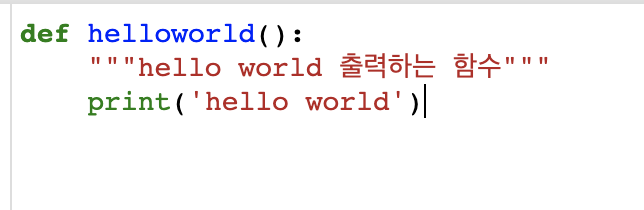

In [93]:
from hello import helloworld
# help 사용
help(helloworld)

Help on function helloworld in module hello:

helloworld()
    hello world 출력하는 함수



## 1 minute, 스낵 파이썬 - 016. 프로파일링을 통한 코드 최적화 팁

* 이 챕터에서 다룰 내용 : 프로파일(https://docs.python.org/ko/3/library/profile.html)
* snakeviz 사용한 보고서 생성(https://jiffyclub.github.io/snakeviz/)

---

* 처리 속도 측정 후 가장 속도 개선이 필요한 부분부터 개선해나가는 것이 좋습니다. 통상 아주 짧은 반복문 등은 개선할 여지가 더이상 없을 가능성이 크니까요.
* 반복문을 사용하지 않고 문제를 해결할 수 있는 방법이 있는지 찾습니다.(zip, map, filter 등을 사용)
* 파이썬의 내장함수를 사용합니다.
* 파이썬의 내장함수보다 빠른 라이브러리가 있는지 찾습니다.
    - numpy, pandas는 파이썬에 비해 엄청 빠르다.
* 전역 변수를 사용하면 느려집니다. 지역변수를 사용하세요. global 사용을 권장하지 않습니다.
* 가비지 컬렉션이 있지만, 사용이 끝난 변수가 원시 객체일 때에는 메모리 영역을 캐시로 유지하는 경우가 있으니 크기가 큰 데이터는 del 키워드를 사용하여 삭제하거나 함수 안에서 사용하여 함수가 끝날 때 삭제되도록 유도합니다.
    - 메모리를 무조건 반환해주진 않는다. 그래서 del로 반환을 유도,
* numpy나 pandas에서 in-place로 원본을 직접 수정하거나 사본생성을 하는 flatten같은 것은 사본 생성을 안하는 ravel로 대체합니다.
    - in-place 사용 권장
    - 사본 생성을 하지 않는 것이 좋다.(flatten -> ravel)

In [94]:
import random
import cProfile

def 문자열거꾸로_재귀함수(s):
    if len(s) == 1:
        return s
    else:
        return 문자열거꾸로_재귀함수(s[1:]) + s[0] 

def 문자열거꾸로_슬라이싱(s):
    return s[::-1]

def 문자열거꾸로_반복문(s):
    answer = ''
    for i in s:
        answer = i + answer
    return answer


def test_set():
    s = ''.join([chr(random.randint(97, 122)) for _ in range(2000)])
    문자열거꾸로_재귀함수(s)
    문자열거꾸로_슬라이싱(s)
    문자열거꾸로_반복문(s)


cProfile.run("test_set()")

         16473 function calls (14474 primitive calls) in 0.850 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 1722184100.py:10(문자열거꾸로_슬라이싱)
        1    0.000    0.000    0.000    0.000 1722184100.py:13(문자열거꾸로_반복문)
        1    0.000    0.000    0.850    0.850 1722184100.py:20(test_set)
        1    0.001    0.001    0.006    0.006 1722184100.py:21(<listcomp>)
   2000/1    0.843    0.000    0.844    0.844 1722184100.py:4(문자열거꾸로_재귀함수)
        1    0.000    0.000    0.850    0.850 <string>:1(<module>)
     2000    0.001    0.000    0.004    0.000 random.py:200(randrange)
     2000    0.001    0.000    0.004    0.000 random.py:244(randint)
     2000    0.002    0.000    0.002    0.000 random.py:250(_randbelow_with_getrandbits)
     2000    0.000    0.000    0.000    0.000 {built-in method builtins.chr}
        1    0.000    0.000    0.850    0.850 {built-in method builtins.exec}
 